In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize
import networkx as nx

In [2]:
#PROYECCION BOGOTÁ
EPSG = 'EPSG:21897'

In [3]:
ZAT_index = pd.read_csv("bogota/zat_index.txt", sep=" ", header=None, names=["ZAT", "index"])
ZAT = gpd.read_file("bogota/ZAT/ZAT.shp")[['ZAT', 'geometry']].to_crs(EPSG)
ZAT = ZAT.merge(ZAT_index, on="ZAT")

/tmp/ipykernel_32374/1857074947.py:24: FutureWarning: The default value of numeric_only in GeoDataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  ZAT_destinations['total_tests_dest'] = (ZAT_destinations['chosen_dest'] / (ZAT_destinations.sum()['chosen_dest']))# / ZAT_destinations['total_dest']
/tmp/ipykernel_32374/1857074947.py:24: FutureWarning: The default value of numeric_only in GeoDataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  ZAT_destinations['total_tests_dest'] = (ZAT_destinations['chosen_dest'] / (ZAT_destinations.sum()['chosen_dest']))# / ZAT_destinations['total_dest']
/tmp/ipykernel_32374/1857074947.py:24: FutureWarning: The defaul

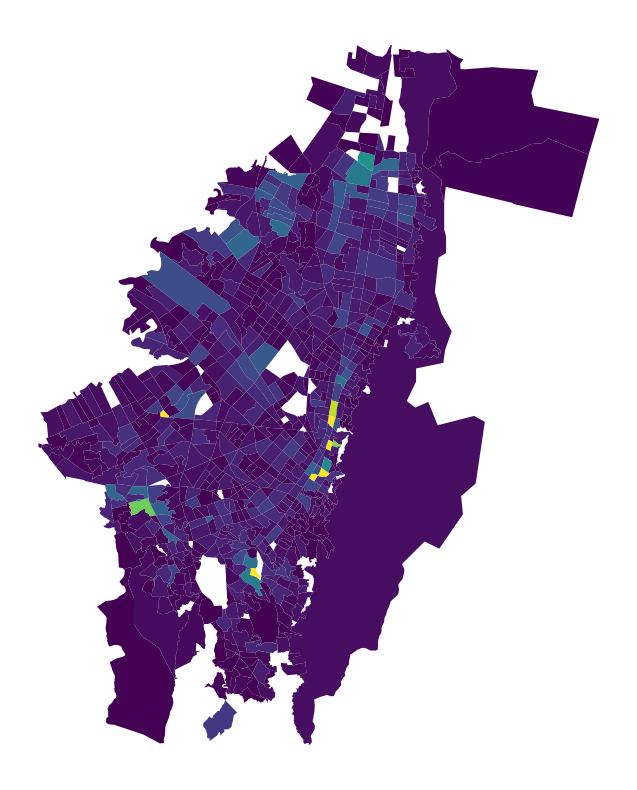

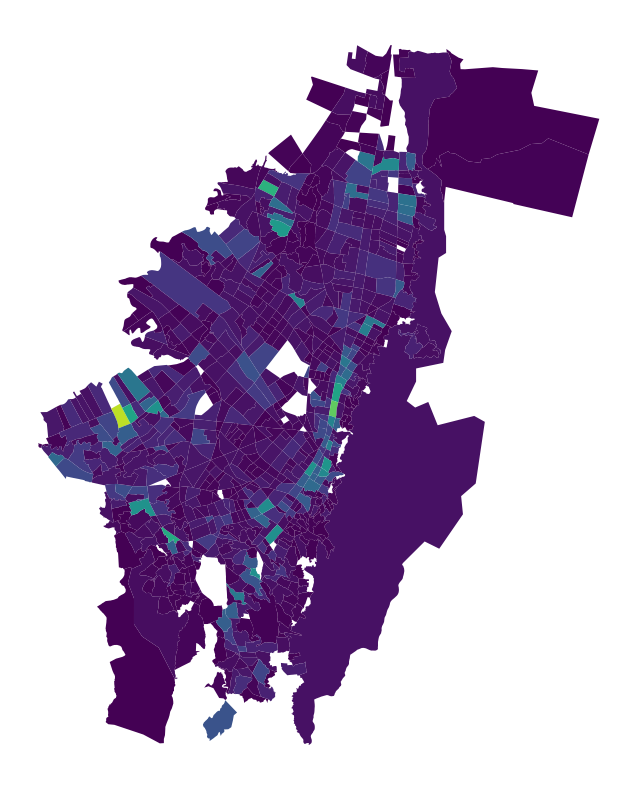

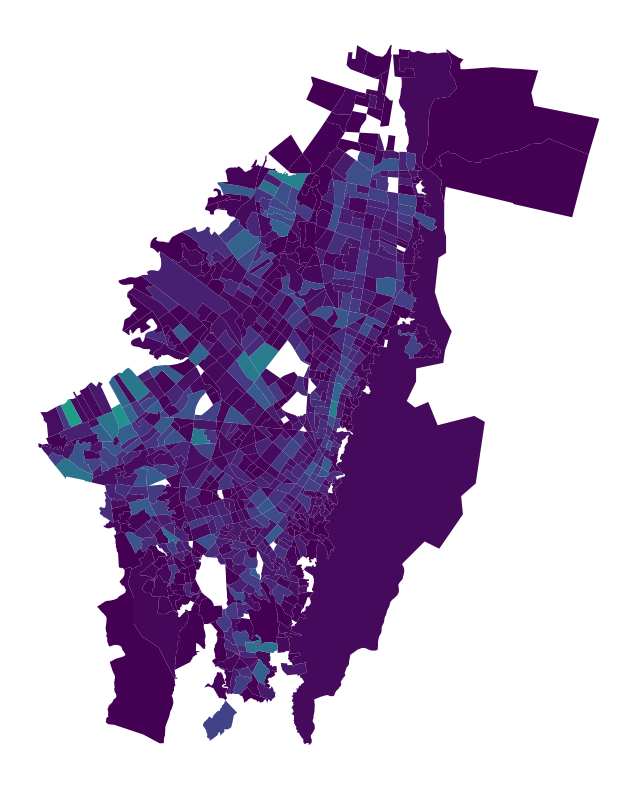

In [64]:
total_tests = 200000

for Nlc in ['8000', '28000', '45000']:
    chosenLinks = pd.read_csv(f"chosen_links/{Nlc}_bogota.txt", sep = "\t", header = None, names = ['i_index', 'j_index', 'population'])
    # Get the ZAT of each link
    chosenLinksZAT = pd.merge(
        chosenLinks, ZAT_index, left_on = 'i_index', right_on = 'index', how = 'left').merge(
        ZAT_index, left_on = 'j_index', right_on = 'index', how = 'left')[['ZAT_x', 'ZAT_y', 'population']].rename(columns={'ZAT_x': 'i_ZAT', 'ZAT_y': 'j_ZAT'})


    mobnetwork = pd.read_csv('chosen_links/ALL_bogota.txt', sep = "\t", header = None, names = ['i_index', 'j_index', 'population'])
    # Get the ZAT of each link
    mobnetworkZAT = pd.merge(
        mobnetwork, ZAT_index, left_on = 'i_index', right_on = 'index', how = 'left').merge(
        ZAT_index, left_on = 'j_index', right_on = 'index', how = 'left')[['ZAT_x', 'ZAT_y', 'population']].rename(columns={'ZAT_x': 'i_ZAT', 'ZAT_y': 'j_ZAT'})

    chosen_dest = chosenLinksZAT.groupby('j_ZAT')['population'].sum().reset_index().rename(columns={'population': 'chosen_dest', 'j_ZAT': 'ZAT'})
    total_dest = mobnetworkZAT.groupby('j_ZAT')['population'].sum().reset_index().rename(columns={'population': 'total_dest', 'j_ZAT': 'ZAT'})

    ZAT_destinations = pd.merge(ZAT, chosen_dest, on = 'ZAT', how = 'left').merge(total_dest, on = 'ZAT', how = 'left').fillna(0)

    ZAT_destinations['ratio'] = ZAT_destinations['chosen_dest'] / ZAT_destinations['total_dest']

    ZAT_destinations['total_tests_dest'] = (ZAT_destinations['chosen_dest'] / (ZAT_destinations.sum()['chosen_dest']))# / ZAT_destinations['total_dest']

    fig, ax = plt.subplots(figsize=(10,10))

    max_tests = 5000
    ZAT_destinations.plot('total_tests_dest', ax=ax, cmap = mpl.colormaps.get_cmap('viridis'), linewidth=0, alpha=1, norm=Normalize(vmin=0, vmax=0.016))
    # ZAT.boundary.plot(ax=ax, color='black', linewidth=0.3, alpha=1)

    ax.axis('off')

    fig.show()
    fig.savefig(f'out/tested_dest_bogota_{Nlc}.pdf', dpi=300, bbox_inches='tight')

# GEO cities3

In [60]:
import pandas as pd
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [61]:
zcta = gpd.read_file('geo/zcta510/tl_2020_us_zcta510.shp')
zcta = zcta.astype({'ZCTA5CE10': 'int64'})

In [62]:
statename = 'fl'
city = 'miami'

states_fips = pd.read_csv('geo/states_fips.txt',sep=',', index_col=0)
statefip = states_fips.loc[statename,'FIPS']


zcta_index = pd.read_csv('cities3/'+city+'/zcta_index.csv', sep=' ')#.reset_index()
zcta_index = zcta.merge(zcta_index, left_on='ZCTA5CE10', right_on='zcta')
zcta_index = zcta_index.sort_values('zcta_index')[['zcta', 'zcta_index', 'geometry']].rename(columns={'zcta_index':'index'})

/tmp/ipykernel_32374/3819583021.py:25: FutureWarning: The default value of numeric_only in GeoDataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  zcta_destinations['total_tests_dest'] = (zcta_destinations['chosen_dest'] / (zcta_destinations.sum()['chosen_dest']))# / ZAT_destinations['total_dest']
/tmp/ipykernel_32374/3819583021.py:25: FutureWarning: The default value of numeric_only in GeoDataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  zcta_destinations['total_tests_dest'] = (zcta_destinations['chosen_dest'] / (zcta_destinations.sum()['chosen_dest']))# / ZAT_destinations['total_dest']
/tmp/ipykernel_32374/3819583021.py:25: FutureWarning: The 

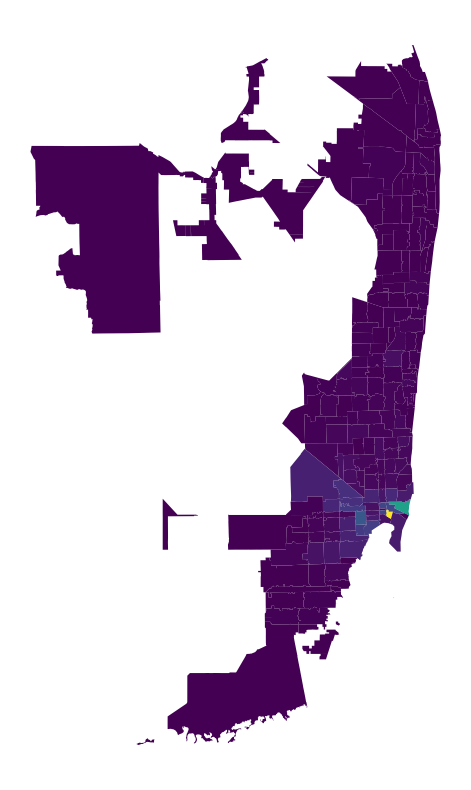

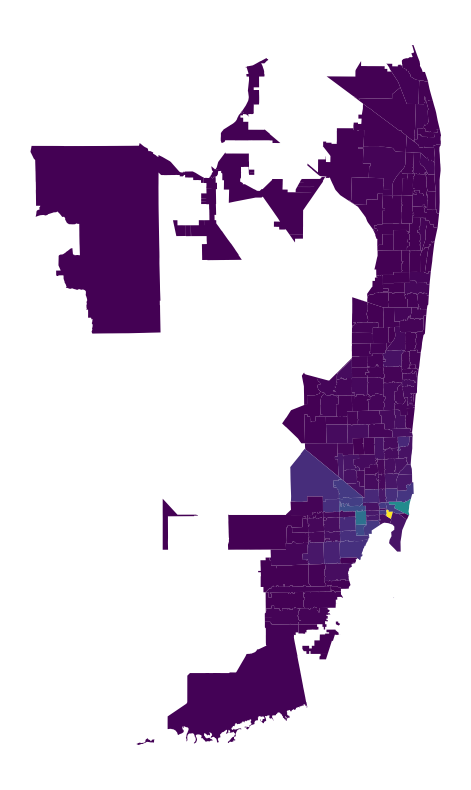

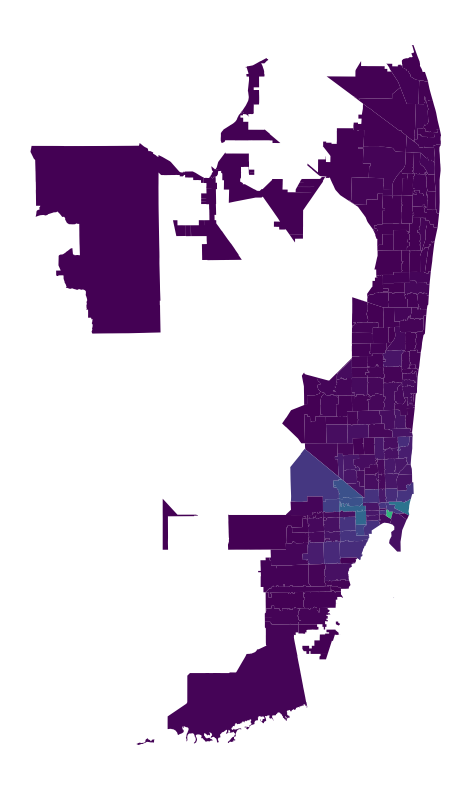

In [69]:
Nlc = '2000'

for Nlc in ['2000', '4000', '6000']:

    chosenLinks = pd.read_csv(f"chosen_links/{Nlc}_{city}.txt", sep = "\t", header = None, names = ['i_index', 'j_index', 'population'])
    # Get the ZAT of each link
    chosenLinks_zcta = pd.merge(
        chosenLinks, zcta_index, left_on = 'i_index', right_on = 'index', how = 'left').merge(
        zcta_index, left_on = 'j_index', right_on = 'index', how = 'left')[['zcta_x', 'zcta_y', 'population']].rename(columns={'zcta_x': 'i_zcta', 'zcta_y': 'j_zcta'})


    mobnetwork = pd.read_csv(f'chosen_links/ALL_{city}.txt', sep = "\t", header = None, names = ['i_index', 'j_index', 'population'])
    # Get the ZAT of each link
    mobnetwork_zcta = pd.merge(
        mobnetwork, zcta_index, left_on = 'i_index', right_on = 'index', how = 'left').merge(
        zcta_index, left_on = 'j_index', right_on = 'index', how = 'left')[['zcta_x', 'zcta_y', 'population']].rename(columns={'zcta_x': 'i_zcta', 'zcta_y': 'j_zcta'})

    chosen_dest = chosenLinks_zcta.groupby('j_zcta')['population'].sum().reset_index().rename(columns={'population': 'chosen_dest', 'j_zcta': 'zcta'})
    total_dest = mobnetwork_zcta.groupby('j_zcta')['population'].sum().reset_index().rename(columns={'population': 'total_dest', 'j_zcta': 'zcta'})

    zcta_destinations = pd.merge(zcta_index, chosen_dest, on = 'zcta', how = 'left').merge(total_dest, on = 'zcta', how = 'left').fillna(0)

    zcta_destinations['ratio'] = (zcta_destinations['chosen_dest'] / zcta_destinations['total_dest']).fillna(0)

    zcta_destinations['total_tests_dest'] = (zcta_destinations['chosen_dest'] / (zcta_destinations.sum()['chosen_dest']))# / ZAT_destinations['total_dest']

    fig, ax = plt.subplots(figsize=(10,10))

    zcta_destinations.plot('total_tests_dest', ax=ax, cmap = mpl.colormaps.get_cmap('viridis'), linewidth=0, alpha=1, norm=Normalize(vmin=0, vmax=0.14))
    # ZAT.boundary.plot(ax=ax, color='black', linewidth=0.3, alpha=1)

    ax.axis('off')

    fig.show()
    fig.savefig(f'out/tested_dest_{city}_{Nlc}.pdf', dpi=300, bbox_inches='tight')
    

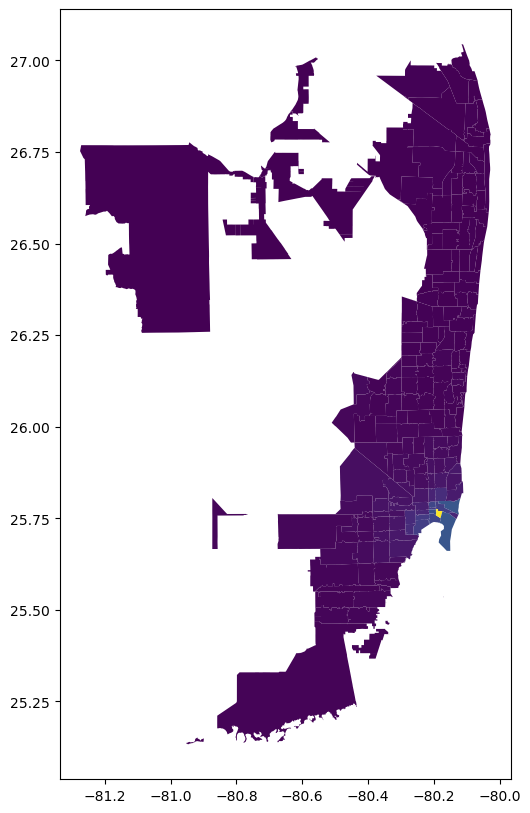

In [39]:
fig, ax = plt.subplots(figsize=(10,10))
zcta_destinations.plot('ratio', ax=ax, cmap = mpl.colormaps.get_cmap('viridis'), linewidth=0, alpha=1, norm=Normalize(vmin=0, vmax=1))

plt.savefig(f'links_dest_{city}_{Nlc}.png', dpi=300, bbox_inches='tight')